<a href="https://colab.research.google.com/github/Sinem-B62/customer-segmentation-traveltide/blob/main/TravelTide_Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mastery Project: Kundensegmentierung für TravelTide mittels Unüberwachtem Lernens**


---

Willkommen zu diesem Data-Science-Projekt. In diesem Notebook wird eine Kundensegmentierung für das (fiktive) Reiseportal **TravelTide** durchgeführt. Ziel ist es, mittels unüberwachtem maschinellem Lernen (K-Means) klar definierte Kunden-Personas zu entwickeln. Diese Personas dienen als strategische Grundlage für die Konzeption personalisierter Marketingmaßnahmen, insbesondere für ein neues Prämienprogramm. ✈⛳

Eine ausführliche Beschreibung des Business Case, der Methodik und der finalen Handlungsempfehlungen finden Sie in der vollständigen **[Projektdokumentation (PDF)](https://drive.google.com/file/d/1JSCzGCLgOHT0fcPwOq1v_1KfiYoFEVc7/view?usp=sharing)**.

---

# **1. Import & Überprüfung der Daten**

## 1.1 Imporiert aller notwendigen Python-Bibliotheken

In [ ]:
# Datenmanipulation
import pandas as pd
import numpy as np

# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning mit Blibliotheken
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 1.2 Upload der Datei die in SQL aus 4 Tabellen gewonnen wurde.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Final_TravelTide_Daten.xlsx to Final_TravelTide_Daten.xlsx


In [ ]:
df = pd.read_excel("Final_TravelTide_Daten.xlsx")

## 1.3 Überprüfung alle samt Daten auf Nullwerte sowie Transformation der Datentypen

In [ ]:
df

,user_id,age,gender,married,has_children,home_country,home_city,home_airport,trip_id,session_start,...,hotel_discount,cancellation,has_booked,trip_airline,destination,base_fare_usd,checked_bags,hotel_name,nights,hotel_per_room_usd
0,0,35,F,False,False,usa,minneapolis,MSP,0-4660ff6465694177915a89aadedf81cc,2023-03-13 19:19:00,...,False,False,1,Frontier Airlines,denver,205.16,0.0,Shangri-La - denver,4.0,130.0
1,2,32,M,False,False,usa,portland,PDX,NaN,2023-02-25 18:34:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32,M,False,False,usa,portland,PDX,NaN,2023-02-27 10:31:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,28,F,False,False,usa,houston,IAH,NaN,2023-03-09 20:03:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,47,M,True,True,usa,honolulu,HNL,NaN,2023-03-05 03:02:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,40181,19,M,False,False,usa,new york,LGA,NaN,2023-07-01 08:22:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,40183,52,F,True,False,usa,el paso,BIF,40183-6f14896e9a5843a58769fd994bd4f3d0,2023-01-28 03:28:00,...,False,False,1,LACSA,san jose,268.07,1.0,NH Hotel - san jose,0.0,260.0
49997,40183,52,F,True,False,usa,el paso,BIF,40183-c653a3e0acdd4a2b81a1a611a6062f25,2023-02-19 22:22:00,...,False,False,1,Delta Air Lines,las vegas,354.61,2.0,Best Western - las vegas,4.0,124.0
49998,40183,52,F,True,False,usa,el paso,BIF,NaN,2023-03-31 19:52:00,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
float_cols = df.select_dtypes(include='float64').columns

for col in float_cols:
    df[col] = np.rint(df[col]).astype('Int64')

print(df.dtypes)

user_id                int64
age                    int64
gender                object
married                 bool
has_children            bool
home_country          object
home_city             object
home_airport          object
trip_id               object
session_start         object
session_end           object
page_clicks            int64
flight_discount         bool
hotel_discount          bool
cancellation            bool
has_booked             int64
trip_airline          object
destination           object
base_fare_usd          Int64
checked_bags           Int64
hotel_name            object
nights                 Int64
hotel_per_room_usd     Int64
dtype: object


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
nights,31745
hotel_name,31745
hotel_per_room_usd,31745
trip_airline,31344
destination,31344
checked_bags,31344
base_fare_usd,31344
trip_id,28235
home_city,0
has_children,0


Die Zeilen die Null-Werte haben, werde nicht entfernt da wir uns auch die Kundengruppe anschauen möchten die keine Reise gebucht haben. Zur Analysezwecken wieso und woran es vielleicht liegt, werden diese Werte mit "nicht gebucht" ersetzt um im späteren Verlauf genauer untersucht. Ziel ist es, auch Personas anzusprechen die oft auf der Website verweilen und der ursache anzugehen, wieso es zur keine Buchung kommt.

In [ ]:

numeric_cols_with_null = ['nights', 'hotel_per_room_usd', 'base_fare_usd', 'checked_bags']
categorical_cols_with_null = ['hotel_name', 'trip_airline', 'destination', 'trip_id']

df[numeric_cols_with_null] = df[numeric_cols_with_null].fillna(0)

df[categorical_cols_with_null] = df[categorical_cols_with_null].fillna('Nicht gebucht')

print("Remaining null-values after replacement:")
print(df.isnull().sum().sort_values(ascending=False))

Remaining null-values after replacement:
user_id               0
age                   0
gender                0
married               0
has_children          0
home_country          0
home_city             0
home_airport          0
trip_id               0
session_start         0
session_end           0
page_clicks           0
flight_discount       0
hotel_discount        0
cancellation          0
has_booked            0
trip_airline          0
destination           0
base_fare_usd         0
checked_bags          0
hotel_name            0
nights                0
hotel_per_room_usd    0
dtype: int64


# **2. Explorative Datenanalyse (EDA): Statistische Erstbewertung der Daten**

Vor dem eigentlichen Feature Engineering ist es entscheidend, ein grundlegendes Verständnis für die Rohdaten zu entwickeln. Die Explorative Datenanalyse (EDA) dient genau diesem Zweck. In diesem Schritt nutzen wir deskriptive Statistiken, um die Verteilung, die zentrale Tendenz und die Streuung unserer numerischen Merkmale zu untersuchen.

---


In [ ]:
df.describe()

,user_id,age,page_clicks,has_booked,base_fare_usd,checked_bags,nights,hotel_per_room_usd
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,20262.990420,42.34480,19.549200,0.435300,279.9162,0.23348,1.57408,65.26244
std,11579.406972,12.69866,24.648464,0.495801,903.574471,0.55747,3.403607,111.741072
min,0.000000,18.00000,1.000000,0.000000,0.0,0.0,-2.0,0.0
25%,10242.000000,34.00000,7.000000,0.000000,0.0,0.0,0.0,0.0
50%,20404.000000,42.00000,15.000000,0.000000,0.0,0.0,0.0,0.0
75%,30319.750000,50.25000,23.000000,1.000000,264.0,0.0,2.0,111.0
max,40184.000000,92.00000,360.000000,1.000000,20411.0,9.0,55.0,1324.0


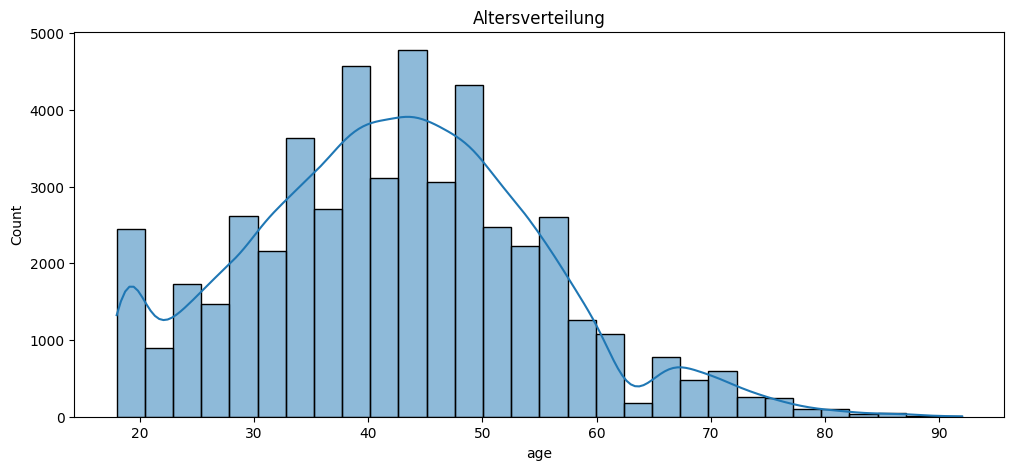

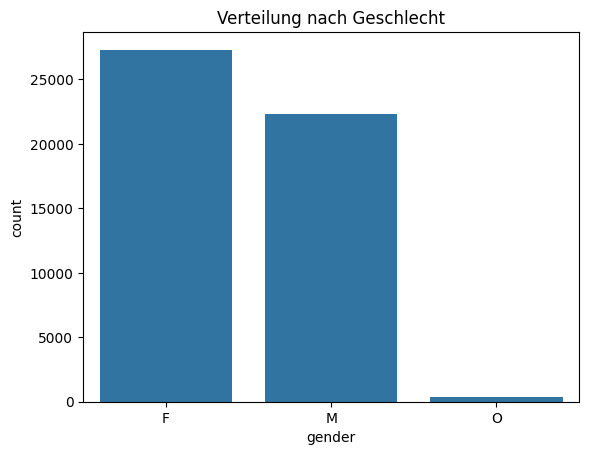

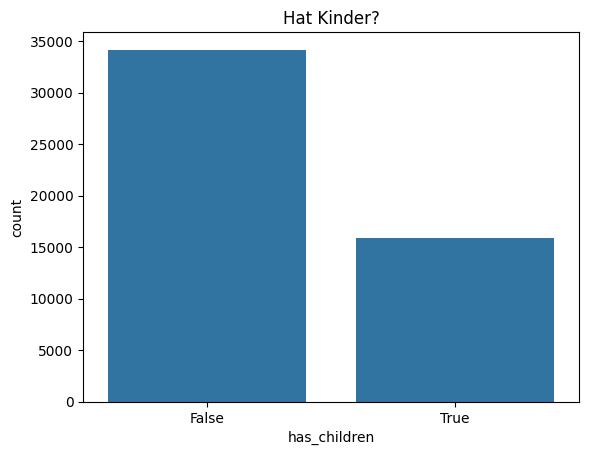

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Altersverteilung")
plt.show()

sns.countplot(x="gender", data=df)
plt.title("Verteilung nach Geschlecht")
plt.show()

sns.countplot(x="has_children", data=df)
plt.title("Hat Kinder?")
plt.show()

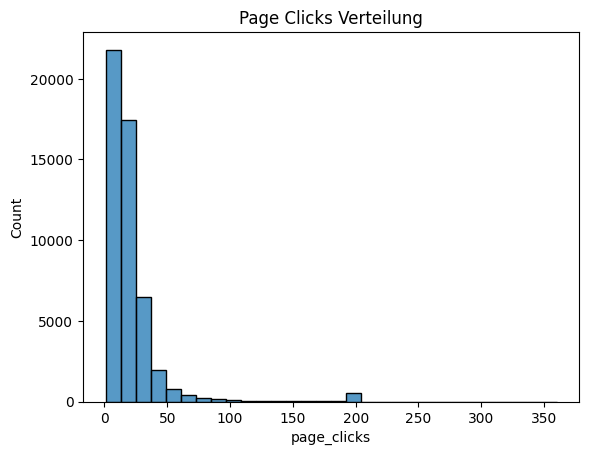

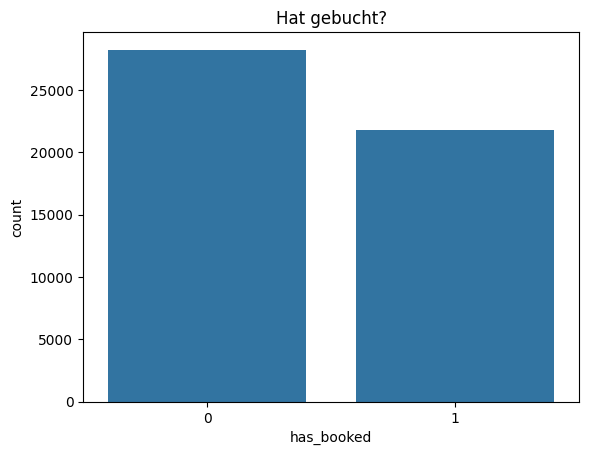

In [ ]:
sns.histplot(df['page_clicks'], bins=30, kde=False)
plt.title("Page Clicks Verteilung")
plt.show()

sns.countplot(x="has_booked", data=df)
plt.title("Hat gebucht?")
plt.show()

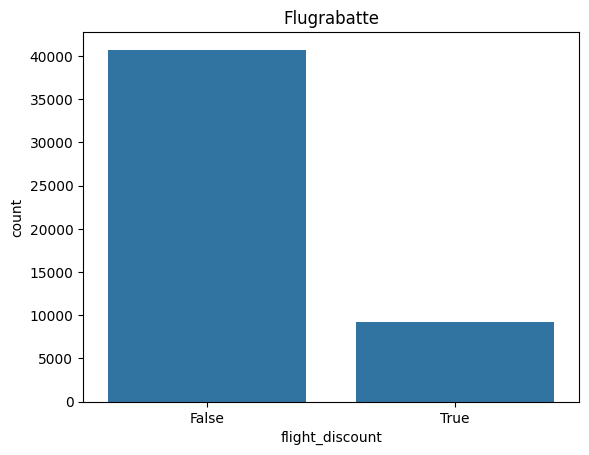

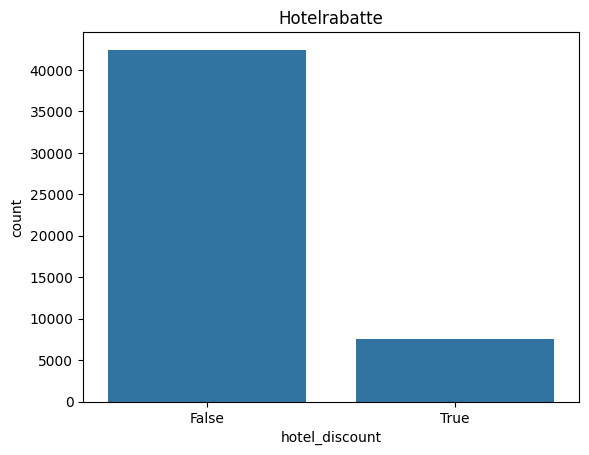

In [ ]:
sns.countplot(x="flight_discount", data=df)
plt.title("Flugrabatte")
plt.show()

sns.countplot(x="hotel_discount", data=df)
plt.title("Hotelrabatte")
plt.show()

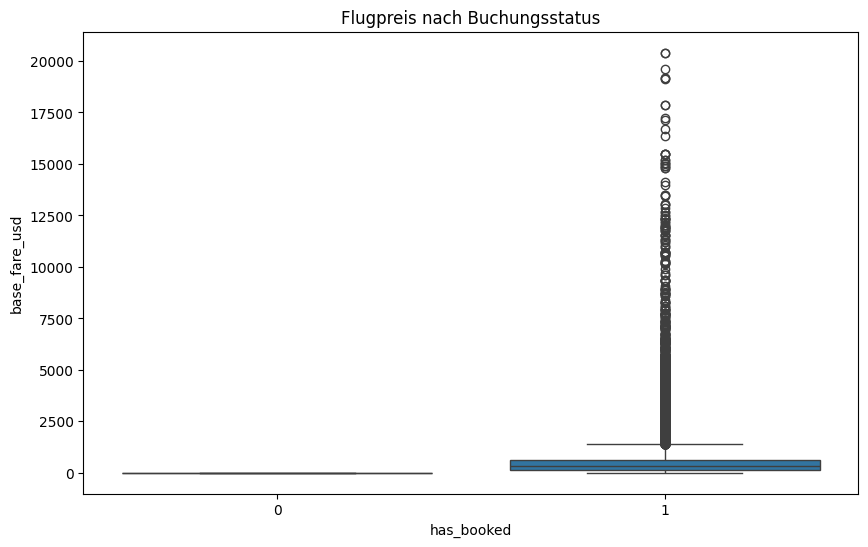

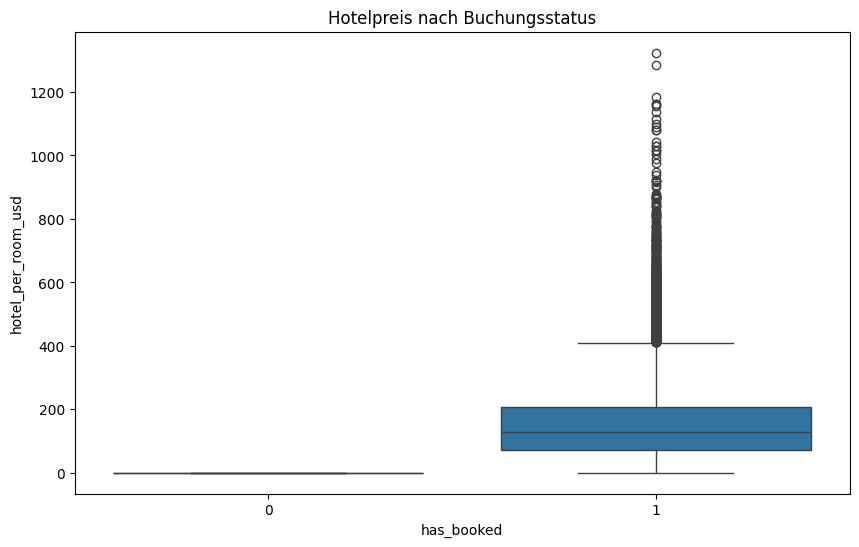

In [ ]:

plt.figure(figsize=(10,6))
sns.boxplot(x="has_booked", y="base_fare_usd", data=df)
plt.title("Flugpreis nach Buchungsstatus")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="has_booked", y="hotel_per_room_usd", data=df)
plt.title("Hotelpreis nach Buchungsstatus")
plt.show()



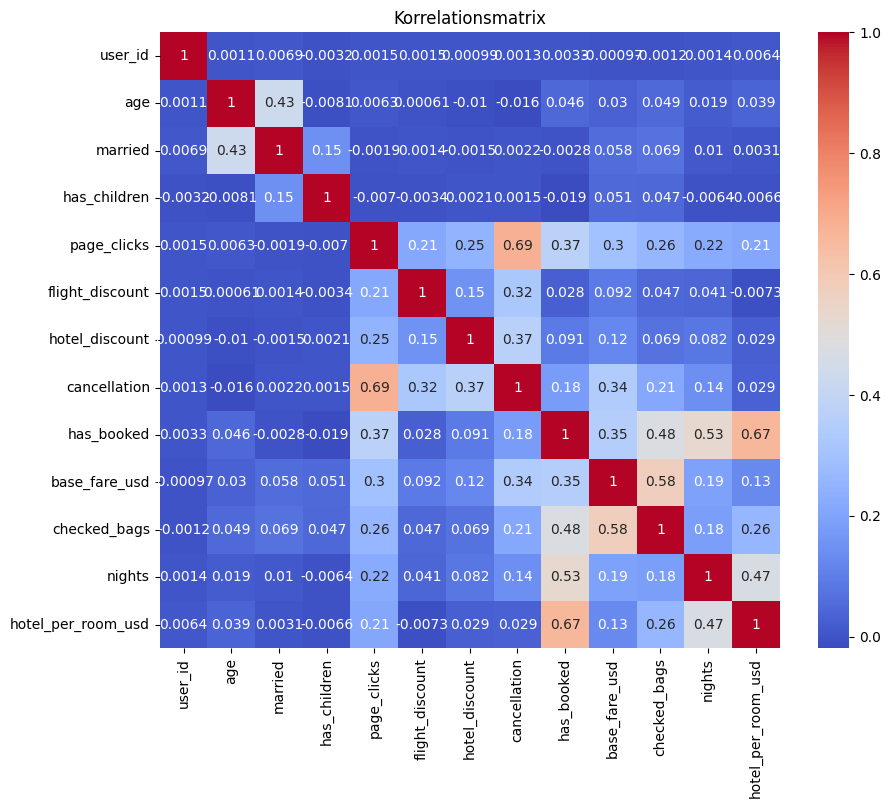

In [ ]:
# Heatmap Korrelationen
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# **3. Feature Engineering**

### 3.1 Normalisierung der Attribute für die Analyse:

In diesem ersten Schritt der Datenvorverarbeitung wandeln wir verschiedene text- und wahrheitsbasierte Spalten (Attribute) in ein einheitliches, numerisches Format um. Machine-Learning-Modelle können nicht direkt mit Text oder True/False-Werten arbeiten; sie benötigen Zahlen, um mathematische Muster zu erkennen.

In [ ]:
import numpy as np

# bool-Spalten -> 0/1
bool_cols = df.select_dtypes(include=['bool']).columns

df[bool_cols] = df[bool_cols].astype('int8')

# trip_id-Flag: "nicht gebucht"/leer/NaN -> 0, sonst 1
s = df['trip_id'].astype('string').str.strip().str.casefold()
df['trip_booked'] = np.where(s.isna() | s.eq('') | s.eq('nicht gebucht'), 0, 1).astype('int8')




In [ ]:
print(df[bool_cols].dtypes)      # sollten jetzt int8 sein
print(df['trip_booked'].value_counts(dropna=False))

married            int8
has_children       int8
flight_discount    int8
hotel_discount     int8
cancellation       int8
dtype: object
trip_booked
0    28235
1    21765
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. 'gender' Label-Encodieren (F → 0, M → 1)
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# 2. 'home_country' binär encodieren: USA → 0, Canada → 1
df['home_country'] = LabelEncoder().fit_transform(df['home_country'])

### 3.2 Erstellung neuer Attributen:

In diesem Abschnitt reichern wir unseren Datensatz durch Feature Engineering mit neuen, aussagekräftigen Merkmalen an. Das Ziel ist es, aus den Rohdaten tiefere Einblicke in das Verhalten und die Präferenzen unserer Kunden zu gewinnen. Diese neuen Attribute sind entscheidend, um später präzise Kundensegmente zu bilden.

**Loyalitäts- und Konversionsmetriken:** Attribute wie der loyalty_indicator (Gesamtzahl der Buchungen eines Kunden) und die booking_ratio (Verhältnis von Buchungen zu Klicks) helfen uns, die Bindung und Entschlossenheit eines Kunden quantitativ zu messen. Loyale und schnell buchende Kunden sind für TravelTide besonders wertvoll.

In [ ]:
df['total_trip_cost'] = df['base_fare_usd'] + (df['hotel_per_room_usd'] * df['nights'])

In [ ]:
df['booking_ratio'] = df['has_booked'] / (df['page_clicks'] + 1e-6)

In [ ]:
# Anzahl gebuchter Trips pro user_id
loyalty = df.groupby('user_id')['has_booked'].sum().reset_index()
loyalty.rename(columns={'has_booked': 'loyalty_indicator'}, inplace=True)

# zurückjoinen ins Haupt-DF
df = df.merge(loyalty, on='user_id', how='left')

In [ ]:
df['perk_free_bag'] = (df['checked_bags'] > 0).astype(int)

**Relevanz von Prämien (Perks):** Wir erzeugen binäre Flags (1/0) wie perk_free_bag und perk_discount. Diese zeigen uns, ob ein Kunde bestimmte Vorteile wie Freigepäck oder Rabatte in der Vergangenheit genutzt hat. Dies ist die Grundlage für die Personalisierung – bucht ein Kunde oft mit Gepäck, ist ein Freigepäck-Gutschein für ihn relevanter als ein Hotelrabatt.

In [ ]:
df['perk_discount'] = ((df['has_booked'] == 1) &
                      ((df['flight_discount'] == True) | (df['hotel_discount'] == True))).astype(int)


**Analyse der Rabatt-Sensitivität:** Indem wir Buchungen mit (perk_discount) und ohne (no_discount_booking) Rabatt vergleichen, können wir die zentrale Geschäftsfrage beantworten: Sind Rabatte der Haupttreiber für Buchungen, oder gibt es eine signifikante Kundengruppe, die auch ohne Preisnachlass bucht? Diese Erkenntnis ist fundamental, um die Effektivität und die Kosten unseres zukünftigen Prämienprogramms zu steuern.

In [ ]:
df['no_discount_booking'] = ((df['has_booked'] == 1) &
                            (df['flight_discount'] == False) &
                            (df['hotel_discount'] == False)).astype(int)


In [ ]:
# Neue Spalte: 1 wenn trip_id != "Nicht gebucht", sonst 0
df['trip_count'] = (df['trip_id'] != "Nicht gebucht").astype(int)

## **3.3 Aggregation auf Benutzerebene: vom Trip zum Kundenprofil**

Dies ist der entscheidende Transformationsschritt unserer Analyse. Bisher hat jede Zeile in unserem Datensatz eine einzelne Interaktion (einen "Trip") dargestellt. Um jedoch Kunden und nicht nur einzelne Reisen zu verstehen, fassen wir nun alle Datenpunkte pro Nutzer in einem einzigen, umfassenden Kundenprofil zusammen.

In [ ]:

df['trip_count'] = (df['trip_id'] != "Nicht gebucht").astype(int)

#Aggregation auf User-Ebene

df_user = df.groupby('user_id').agg({
    # Personenbezogene Attribute (einmalig)
    'age': 'first',
    'gender': 'first',
    'married': 'first',
    'has_children': 'first',
    'home_country': 'first',
    'home_city': 'first',
    'home_airport': 'first',

    # Trips & Verhalten
    'trip_count': 'sum',
    'page_clicks': 'sum',
    'has_booked': 'sum',
    'checked_bags': 'mean',
    'base_fare_usd': 'mean',
    'hotel_per_room_usd': 'mean',
    'total_trip_cost': 'mean',
    'nights': 'mean',

    # Feature Engineering
    'booking_ratio': 'mean',
    'loyalty_indicator': 'sum',
    'perk_free_bag': 'max',
    'perk_discount': 'max',
    'no_discount_booking': 'max'
}).reset_index()

# Klarere Namen
df_user.rename(columns={
    'trip_count': 'num_trips',
    'has_booked': 'loyalty_indicator_total'
}, inplace=True)

# Booking Ratio auf User-Level neu berechnen:
# Verhältnis von Buchungen zu allen Klicks
df_user['booking_ratio_user'] = df_user['loyalty_indicator_total'] / (df_user['page_clicks'] + 1e-6)

# Conversion Rate hinzufügen:
# Anteil der gebuchten Trips an allen Trips
df_user['conversion_rate'] = df_user['loyalty_indicator_total'] / df_user['num_trips']

# Falls ein User 0 Trips hat → NaN in 0 umwandeln
df_user['conversion_rate'] = df_user['conversion_rate'].fillna(0)

df_user


,user_id,age,gender,married,has_children,home_country,home_city,home_airport,num_trips,page_clicks,...,hotel_per_room_usd,total_trip_cost,nights,booking_ratio,loyalty_indicator,perk_free_bag,perk_discount,no_discount_booking,booking_ratio_user,conversion_rate
0,0,35,0,0,0,1,minneapolis,MSP,1,40,...,130.0,725.0,4.0,0.025000,1,0,1,0,0.025000,1.0
1,2,32,1,0,0,1,portland,PDX,0,27,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
2,3,28,0,0,0,1,houston,IAH,0,11,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
3,4,47,1,1,1,1,honolulu,HNL,1,29,...,40.5,723.5,1.0,0.025000,2,1,0,1,0.034483,1.0
4,5,35,0,0,0,0,edmonton,YED,0,7,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,40179,48,0,1,0,1,birmingham,BHM,0,3,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
27096,40180,49,1,1,0,0,toronto,YTZ,1,35,...,74.0,370.0,2.5,0.016129,2,0,0,1,0.028571,1.0
27097,40181,19,1,0,0,1,new york,LGA,0,56,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
27098,40183,52,0,1,0,1,el paso,BIF,2,61,...,128.0,373.0,1.333333,0.026709,6,1,0,1,0.032787,1.0


Dieser aggregierte Datensatz ist die finale Grundlage für unsere Machine-Learning-Modelle. Jede Zeile repräsentiert nun einen einzigartigen Kunden mit all seinen Merkmalen und seiner gesamten bisherigen Interaktions-Historie. Basierend auf diesen verdichteten Profilen werden unsere Clustering-Algorithmen aussagekräftige Kundensegmente identifizieren, wie z.B. "preisbewusste Vielbucher", "treue Premiumkunden ohne Rabattnutzung" oder "potenzielle Familienurlauber". Diese Segmentierung ermöglicht es TravelTide, das Prämienprogramm hochgradig zu personalisieren, die Kundenbindung gezielt zu maximieren und die Abwanderung zu reduzieren.

# **4. Visuelle Explorative Datenanalyse (EDA) der aufbereiteten Kundendaten**

Nachdem wir unsere Daten bereinigt, neue Merkmale konstruiert und alles auf eine einheitliche Benutzerebene aggregiert haben, führen wir eine zweite, diesmal visuelle EDA durch. Ziel dieses Schrittes ist es, die Verteilungen, Beziehungen und Muster in unseren finalen Kundendaten zu visualisieren. Diese grafische Analyse ist entscheidend, um Hypothesen zu bilden und ein intuitives Verständnis für die zu segmentierenden Kundengruppen zu entwickeln.

---

In [ ]:
df_user.describe().round(2)

,user_id,age,gender,married,has_children,home_country,num_trips,page_clicks,loyalty_indicator_total,checked_bags,...,hotel_per_room_usd,total_trip_cost,nights,booking_ratio,loyalty_indicator,perk_free_bag,perk_discount,no_discount_booking,booking_ratio_user,conversion_rate
count,27100.00,27100.00,27100.00,27100.00,27100.00,27100.00,27100.00,27100.00,27100.00,27100.0,...,27100.0,27100.0,27100.0,27100.00,27100.0,27100.00,27100.00,27100.00,27100.00,27100.00
mean,20057.32,42.32,0.48,0.40,0.31,0.83,0.80,36.07,0.80,0.24,...,66.45,578.49,1.62,0.02,1.8,0.30,0.22,0.46,0.02,0.60
std,11609.59,12.68,0.51,0.49,0.46,0.37,0.79,39.97,0.79,0.48,...,94.64,1162.62,3.0,0.02,2.5,0.46,0.42,0.50,0.02,0.49
min,0.00,18.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,...,0.0,-286.0,-1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,9962.75,34.00,0.00,0.00,0.00,1.00,0.00,14.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,20067.50,42.00,0.00,0.00,0.00,1.00,1.00,26.00,1.00,0.0,...,26.5,227.5,0.0,0.02,1.0,0.00,0.00,0.00,0.02,1.00
75%,30101.00,50.00,1.00,1.00,1.00,1.00,1.00,44.00,1.00,0.33,...,106.5,690.08,2.0,0.04,2.0,1.00,0.00,1.00,0.04,1.00
max,40184.00,92.00,2.00,1.00,1.00,1.00,6.00,486.00,6.00,7.0,...,1157.0,30465.0,46.0,0.12,36.0,1.00,1.00,1.00,0.12,1.00


**Verteilung der Kundenaktivität:** Das Histogramm zeigt, dass die Mehrheit der Nutzer nur eine geringe Anzahl von Reisen unternommen und gebucht hat (loyalty_indicator_total).

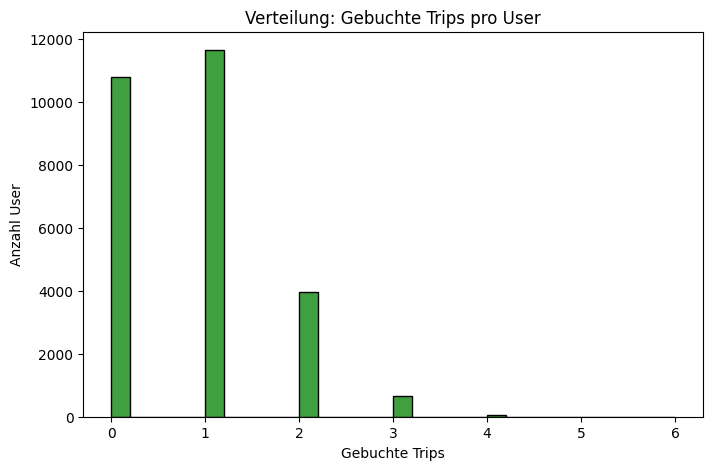

In [ ]:
# Loyalty Indicator (Anzahl gebuchter Trips)
plt.figure(figsize=(8,5))
sns.histplot(df_user['loyalty_indicator_total'], bins=30, kde=False, color="green")
plt.title("Verteilung: Gebuchte Trips pro User")
plt.xlabel("Gebuchte Trips")
plt.ylabel("Anzahl User")
plt.show()

**Conversion Rate Verteilung:** Die Verteilung der conversion_rate ist U-förmig, mit starken Peaks bei 0.0 und 1.0. Das bedeutet, es gibt zwei dominante Kundengruppen: Jene, die bei ihren Besuchen nie buchen (Conversion Rate = 0), und jene, die bei jedem ihrer Trips buchen (Conversion Rate = 1). Das Prämienprogramm muss beide Gruppen unterschiedlich ansprechen – die einen zur ersten Buchung motivieren, die anderen für ihre hohe Treue belohnen.

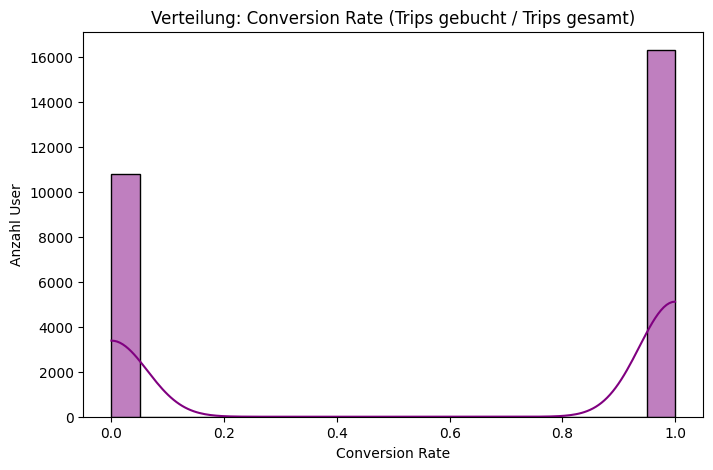

In [ ]:
# Conversion Rate
plt.figure(figsize=(8,5))
sns.histplot(df_user['conversion_rate'], bins=20, kde=True, color="purple")
plt.title("Verteilung: Conversion Rate (Trips gebucht / Trips gesamt)")
plt.xlabel("Conversion Rate")
plt.ylabel("Anzahl User")
plt.show()

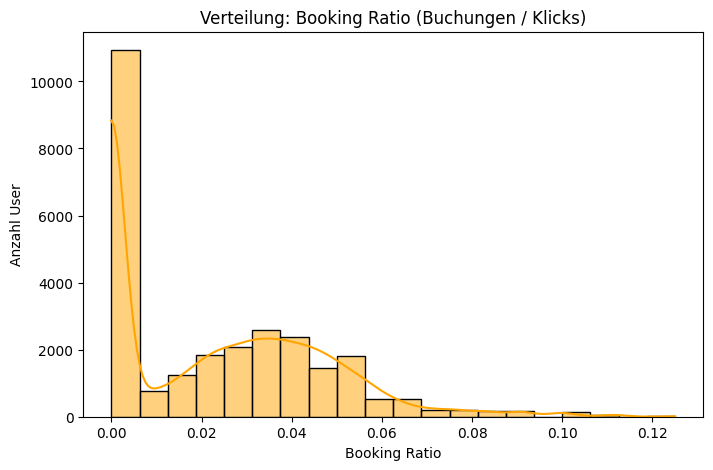

In [ ]:
# Booking Ratio
plt.figure(figsize=(8,5))
sns.histplot(df_user['booking_ratio_user'], bins=20, kde=True, color="orange")
plt.title("Verteilung: Booking Ratio (Buchungen / Klicks)")
plt.xlabel("Booking Ratio")
plt.ylabel("Anzahl User")
plt.show()

**Korrelationsmatrix:** Die Heatmap zeigt die Beziehungen zwischen unseren neuen Merkmalen. Wir sehen starke positive Korrelationen zwischen der Anzahl der Trips, der Loyalität und der Conversion Rate, was logisch ist. Interessanterweise gibt es eine schwache negative Korrelation zwischen der Nutzung von Rabatten (perk_discount) und Buchungen ohne Rabatt (no_discount_booking), was darauf hindeutet, dass es tatsächlich unterschiedliche Kundentypen gibt.

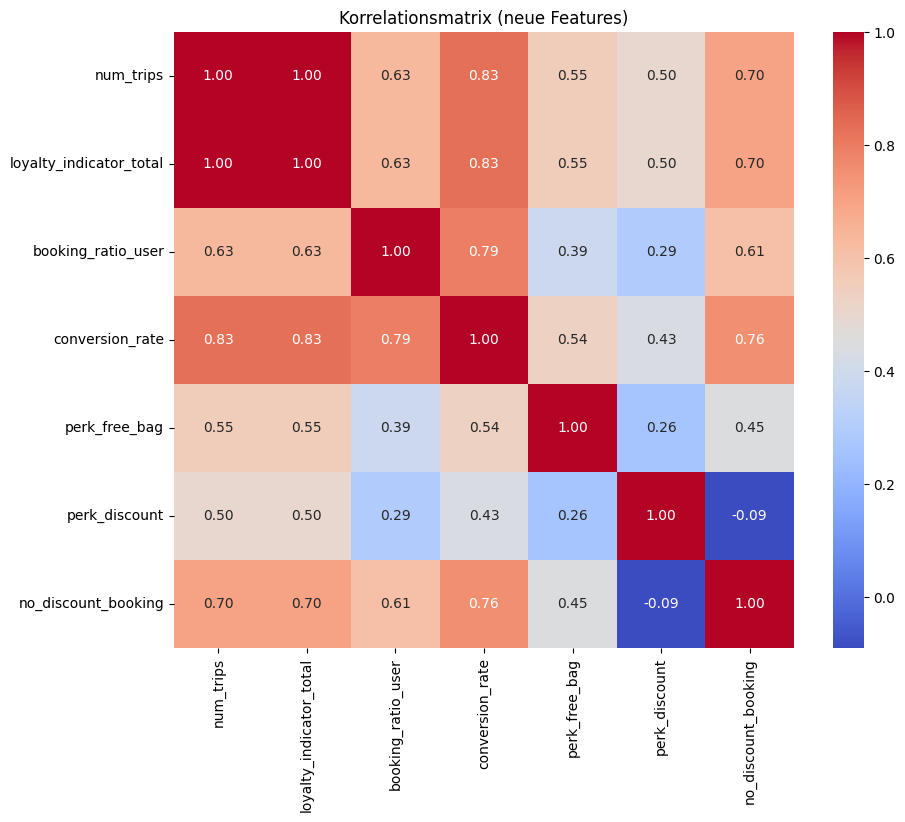

In [ ]:
# Heatmap der Korrelationen
plt.figure(figsize=(10,8))
sns.heatmap(df_user[['num_trips','loyalty_indicator_total',
                     'booking_ratio_user','conversion_rate',
                     'perk_free_bag','perk_discount','no_discount_booking']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix (neue Features)")
plt.show()

**Nutzung von Prämien (Perks) bei buchenden Kunden:**
Durch die Filterung auf ausschließlich buchende Kunden gewinnen wir nun ein klares Bild davon, welche Vorteile für unsere umsatzgenerierende Zielgruppe wirklich relevant sind. Die Analyse zeigt zwei sehr unterschiedliche Verhaltensmuster:

"Free Bag" als starker Polarisator: Überraschenderweise zeigt sich beim "Free Bag"-Vorteil eine fast exakte 50/50-Verteilung. Das bedeutet, die Hälfte unserer aktiven Kunden hat diesen Vorteil mindestens einmal genutzt. Dies widerlegt die frühere Annahme, der Perk sei unattraktiv. Im Gegenteil, er scheint ein zentraler und stark polarisierender Faktor für unsere Kernkundschaft zu sein und stellt somit einen äußerst wirksamen Hebel für unser Prämienprogramm dar.

Rabatte für ein gezieltes Segment: Bei den Rabatten bestätigt sich, dass eine Mehrheit (ca. zwei Drittel) unserer Kunden auch ohne Preisnachlass bucht. Dennoch ist das Drittel, das Rabatte nutzt, ein signifikantes Segment.

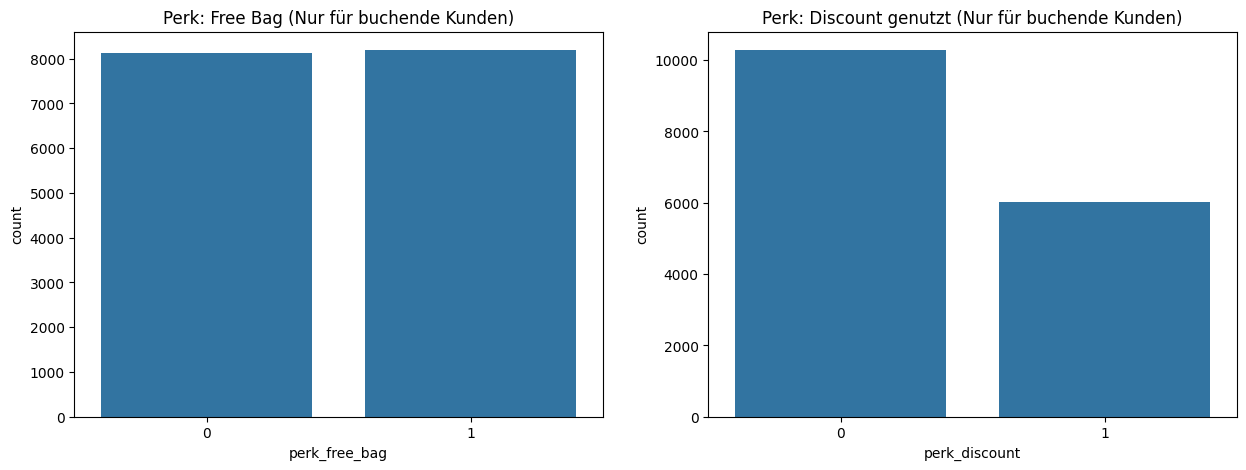

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# --- Plot 1: "Free Bag" für buchende Kunden ---
# Wir filtern df_user direkt im 'data'-Parameter.
# data=df_user[df_user['loyalty_indicator_total'] > 0]
sns.countplot(x='perk_free_bag',
              data=df_user[df_user['loyalty_indicator_total'] > 0],
              ax=axes[0])
axes[0].set_title('Perk: Free Bag (Nur für buchende Kunden)')


# --- Plot 2: "Discount" für buchende Kunden ---
# Wir wenden denselben direkten Filter hier an.
sns.countplot(x='perk_discount',
              data=df_user[df_user['loyalty_indicator_total'] > 0],
              ax=axes[1])
axes[1].set_title('Perk: Discount genutzt (Nur für buchende Kunden)')


plt.show()

In [ ]:
# Gegenkontrolle zur obigen Analyse
df_user[df_user['loyalty_indicator_total'] > 0]['perk_free_bag'].value_counts()

,count
perk_free_bag,
1,8195
0,8119


# **5. Hashing Encoding**
In diesem Schritt wandeln wir die verbliebenen textbasierten Spalten mit einer hohen Anzahl einzigartiger Werte (z.B. home_city, trip_id, hotel_name) in ein numerisches Format um. Das Hashing Encoding löst dieses Problem, indem es jede Kategorie auf eine feste Anzahl neuer, numerischer Dimensionen abbildet (n_components=16).

Dieser Prozess macht entscheidende, aber bisher nicht maschinenlesbare Informationen für unser Modell nutzbar. Er ermöglicht es dem Algorithmus, Muster in Merkmalen wie dem Heimatflughafen, der gewählten Airline oder dem gebuchten Hotel zu erkennen. So können wir tiefere Zusammenhänge aufdecken (z.B. "Sind Kunden einer bestimmten Airline besonders loyal?") und wesentlich präzisere Kundenprofile erstellen. Dies ist die Grundlage, um die Personalisierung des Prämienprogramms von TravelTide auf ein neues Level zu heben.

---

In [ ]:
df_user

,user_id,age,gender,married,has_children,home_country,home_city,home_airport,num_trips,page_clicks,...,hotel_per_room_usd,total_trip_cost,nights,booking_ratio,loyalty_indicator,perk_free_bag,perk_discount,no_discount_booking,booking_ratio_user,conversion_rate
0,0,35,0,0,0,1,minneapolis,MSP,1,40,...,130.0,725.0,4.0,0.025000,1,0,1,0,0.025000,1.0
1,2,32,1,0,0,1,portland,PDX,0,27,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
2,3,28,0,0,0,1,houston,IAH,0,11,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
3,4,47,1,1,1,1,honolulu,HNL,1,29,...,40.5,723.5,1.0,0.025000,2,1,0,1,0.034483,1.0
4,5,35,0,0,0,0,edmonton,YED,0,7,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,40179,48,0,1,0,1,birmingham,BHM,0,3,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
27096,40180,49,1,1,0,0,toronto,YTZ,1,35,...,74.0,370.0,2.5,0.016129,2,0,0,1,0.028571,1.0
27097,40181,19,1,0,0,1,new york,LGA,0,56,...,0.0,0.0,0.0,0.000000,0,0,0,0,0.000000,0.0
27098,40183,52,0,1,0,1,el paso,BIF,2,61,...,128.0,373.0,1.333333,0.026709,6,1,0,1,0.032787,1.0


Spalten mit einer so hohen Anzahl an einzigartigen Werten (hohe Kardinalität)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

categorical_cols = ['home_city', 'home_airport']
n_components = 16


encoder = ce.HashingEncoder(n_components=n_components, cols=categorical_cols)

df_final = encoder.fit_transform(df_user)

print("DataFrame nach dem Hashing Encoding erfolgreich erstellt:")
print(df_final.info())

DataFrame nach dem Hashing Encoding erfolgreich erstellt:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   col_0                    27100 non-null  int64  
 1   col_1                    27100 non-null  int64  
 2   col_2                    27100 non-null  int64  
 3   col_3                    27100 non-null  int64  
 4   col_4                    27100 non-null  int64  
 5   col_5                    27100 non-null  int64  
 6   col_6                    27100 non-null  int64  
 7   col_7                    27100 non-null  int64  
 8   col_8                    27100 non-null  int64  
 9   col_9                    27100 non-null  int64  
 10  col_10                   27100 non-null  int64  
 11  col_11                   27100 non-null  int64  
 12  col_12                   27100 non-null  int64  
 13  col_13            

## 5.1 Standardisierung für die PCA Analyse

Nachdem nun alle unsere Merkmale numerisch sind, müssen wir sie auf eine einheitliche Skala bringen. Diesen Schritt nennt man Standardisierung. Algorithmen wie PCA und K-Means sind distanzbasiert, was bedeutet, dass Merkmale mit großen Wertebereichen (z.B. total_trip_cost) die Analyse stärker beeinflussen würden als Merkmale mit kleinen Wertebereichen (z.B. num_trips). Der StandardScaler transformiert unsere Daten so, dass alle Merkmale einen Mittelwert von 0 und eine Standardabweichung von 1 haben.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_user = scaler.fit_transform(df_final)

# **6. Hauptkomponentenanalyse (PCA)**

In diesem Schritt reduzieren wir mit der Hauptkomponentenanalyse (PCA) die hohe Anzahl unserer Merkmale, um die nachfolgende Kundensegmentierung zu optimieren.

Wir verdichten die Daten auf nur 28 neue, hochinformative Hauptkomponenten, während wir 95% der ursprünglichen Informationsdichte (Varianz) beibehalten. Dieser Prozess fasst komplexe Kundendaten zu wesentlichen Verhaltensmustern zusammen.

Indem wir unseren Clustering-Modellen diese verdichteten Informationen geben, können sie effizienter arbeiten und klarere, aussagekräftigere Kundensegmente identifizieren. Dies ist die entscheidende Grundlage, um für TravelTide passgenaue und wirksame Prämien zu entwickeln.

---

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

principal_components = pca.fit_transform(scaled_user)

Anzahl der gewählten Hauptkomponenten: 27


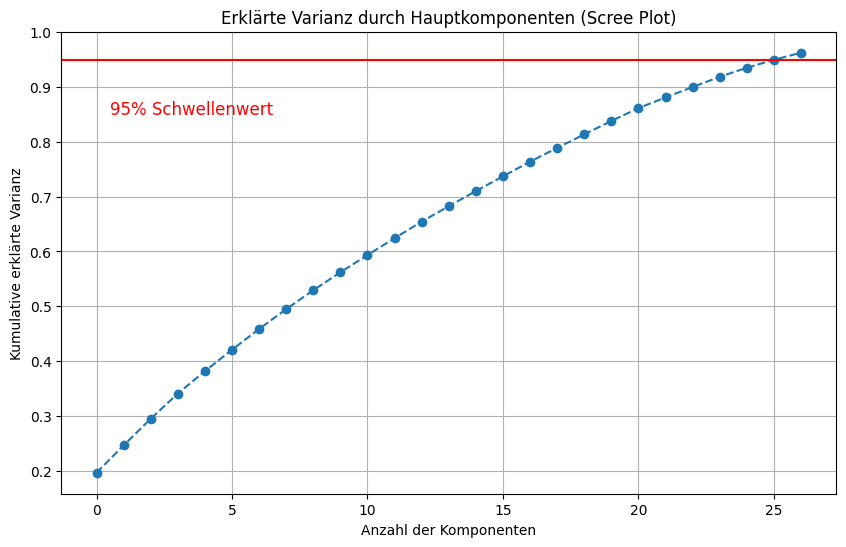

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(f'Anzahl der gewählten Hauptkomponenten: {pca.n_components_}')


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Erklärte Varianz durch Hauptkomponenten (Scree Plot)')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% Schwellenwert', color = 'red', fontsize=12)
plt.show()

# **7. K-Means Machine Learning**

## 7.1 Die optimale Cluster-Anzahl "k" mit der Elbow-Methode finden

 Die Idee ist, das Modell mit einer unterschiedlichen Anzahl von Clustern (z.B. k=1 bis k=10) zu trainieren und dabei einen Wert namens Inertia zu messen.

Inertia: Dies ist die Summe der quadrierten Abstände der Datenpunkte zum Zentrum ihres jeweiligen Clusters. Ein kleinerer Inertia-Wert bedeutet, dass die Punkte enger um ihre Cluster-Zentren liegen – die Cluster sind also dichter und besser definiert.

---

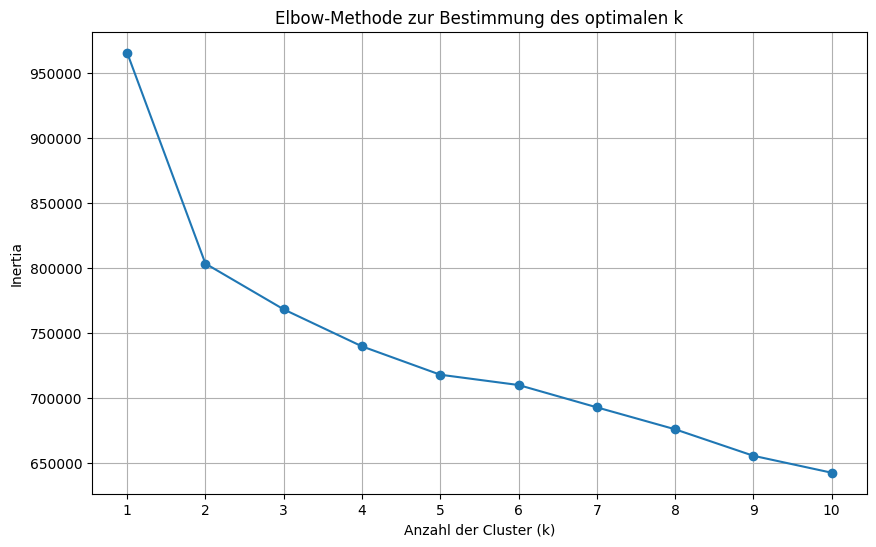

In [ ]:
inertia_werte = []
moegliche_k_werte = range(1, 11) # Wir testen k von 1 bis 10

for k in moegliche_k_werte:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(principal_components)
    inertia_werte.append(kmeans.inertia_)

# Elbow-Plot
plt.figure(figsize=(10, 6))
plt.plot(moegliche_k_werte, inertia_werte, marker='o', linestyle='-')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Bestimmung des optimalen k')
plt.grid(True)
plt.xticks(moegliche_k_werte)
plt.show()

In [ ]:
import pandas as pd

# Umwandlung des NumPy Array 'principal_components' in einen DataFrame
# Dieser Schritt ist entscheidend!
pca_df = pd.DataFrame(data=principal_components,
                      columns=[f'PC_{i+1}' for i in range(principal_components.shape[1])])

optimal_k = 4

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# 2. Trainiere das K-Means-Modell (dieser Teil war schon richtig)
# Wir verwenden hier pca_df, was aber dasselbe Ergebnis liefert
cluster_labels = kmeans_final.fit_predict(principal_components)


# 3. Füge die Cluster-Labels jetzt zum NEUEN DataFrame hinzu
pca_df['cluster'] = cluster_labels
df_user['cluster'] = cluster_labels


# 4. Gib das Ergebnis aus dem DataFrame aus
print(f"Jedem Datenpunkt wurde einer von {optimal_k} Clustern zugewiesen.")
print(pca_df.head())

Jedem Datenpunkt wurde einer von 4 Clustern zugewiesen.
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  0.526403 -0.139255  0.684508  0.199095  0.294069 -1.621570 -0.579307   
1 -2.981014  0.288048  0.939669  0.262939 -0.902041 -0.975320 -1.160605   
2 -3.074729  0.540586  1.729954  0.280075 -0.568888 -1.283575  0.003642   
3  1.298083  1.112396  0.720706 -0.339381  0.868764  1.707460 -0.384202   
4 -3.061385 -0.412867 -1.170168 -0.103393 -0.683755 -0.849581 -0.618719   

       PC_8      PC_9     PC_10  ...     PC_19     PC_20     PC_21     PC_22  \
0  1.614595 -1.252751 -1.901543  ...  1.282071 -0.931173 -0.052663  1.143003   
1 -0.411672  1.078851  0.057796  ... -0.199184  0.557676 -0.882966 -0.733405   
2  1.347574 -0.250105  0.496587  ...  0.010884  0.738834 -0.402040 -0.702967   
3 -0.732315 -1.378596  1.056197  ... -0.490427 -1.360024 -0.672421  0.287474   
4 -1.108160 -0.392347  0.178580  ...  0.202898  0.190283 -1.129791  0.514413   

      PC_23 

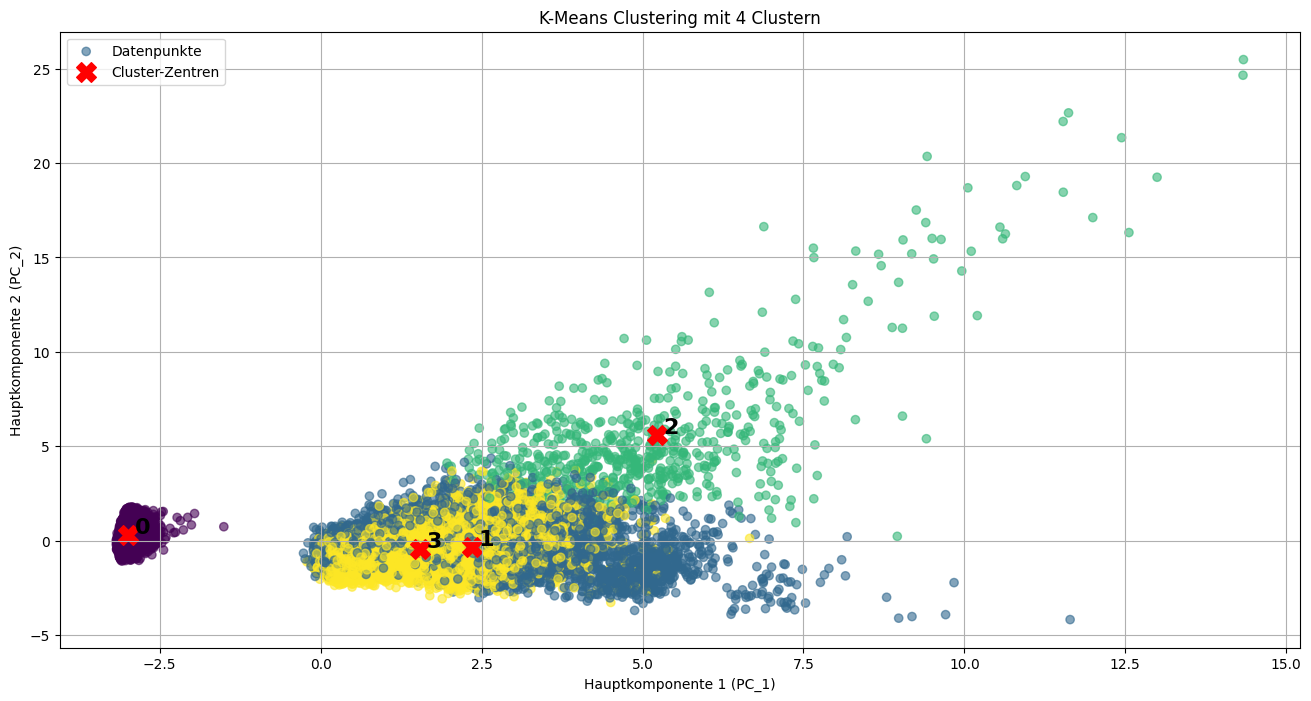

In [ ]:
# Hole die Cluster-Zentren für die Visualisierung
zentren = kmeans_final.cluster_centers_

plt.figure(figsize=(16, 8))

# PC_1 als x-Achse, PC_2 als y-Achse, eingefärbt nach Cluster-Label
plt.scatter(pca_df['PC_1'], pca_df['PC_2'], c=pca_df['cluster'], cmap='viridis', marker='o', alpha=0.6, label='Datenpunkte')

# Skizzieren der Cluster-Zentren
plt.scatter(zentren[:, 0], zentren[:, 1], c='red', s=200, marker='X', label='Cluster-Zentren')

for i, center in enumerate(zentren):
    # Schreibt die Cluster-Nummer (i) direkt neben das rote X (center)
    plt.text(center[0] + 0.1, center[1] + 0.1, str(i), fontsize=16, color='black', fontweight='bold')

plt.xlabel('Hauptkomponente 1 (PC_1)')
plt.ylabel('Hauptkomponente 2 (PC_2)')
plt.title(f'K-Means Clustering mit {optimal_k} Clustern')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_user.columns

Index(['user_id', 'age', 'gender', 'married', 'has_children', 'home_country',
       'home_city', 'home_airport', 'num_trips', 'page_clicks',
       'loyalty_indicator_total', 'checked_bags', 'base_fare_usd',
       'hotel_per_room_usd', 'total_trip_cost', 'nights', 'booking_ratio',
       'loyalty_indicator', 'perk_free_bag', 'perk_discount',
       'no_discount_booking', 'booking_ratio_user', 'conversion_rate',
       'cluster'],
      dtype='object')

## 7.2 Cluster Analyse

In [ ]:
features_to_analyze = [
    'age',
    'num_trips',              # Wie oft reisen sie?
    'total_trip_cost',        # Wie viel geben sie aus?
    'checked_bags',           # Reisen sie mit viel Gepäck?
    'nights',                 # Wie lange bleiben sie?
    'loyalty_indicator_total',# Wie loyal sind sie?
    'conversion_rate',        # Wie oft buchen sie nach einem Besuch?
    'page_clicks',            # Wie aktiv sind sie auf der Seite?
    'has_children'            # Reisen sie mit Kindern?
]

categorical_features_to_analyze = ['home_city', 'home_airport']


for cluster_id in sorted(df_user['cluster'].unique()):
    print(f"📊 --- Analyse für Cluster {cluster_id} ---")

    cluster_df = df_user[df_user['cluster'] == cluster_id]

    print(f"Anzahl der Kunden im Cluster: {len(cluster_df)} (ca. {len(cluster_df)/len(df_user)*100:.1f}% aller Kunden)")
    print("-" * 30)

    # Teil 1: Statistische Zusammenfassung der numerischen Features (wie bisher)
    print("Zusammenfassung der numerischen Merkmale:")
    print(cluster_df[features_to_analyze].describe().round(2))

    # --- Analyse der kategorialen Merkmale ---
    print("\n--- Verteilung der kategorialen Merkmale ---")

    for col in categorical_features_to_analyze:
        print(f"\nTop 5 für '{col}':")
        # Wir zählen die häufigsten Werte und zeigen die Top 5 an
        print(cluster_df[col].value_counts().head(5))

    print("\n" + "="*50 + "\n")

📊 --- Analyse für Cluster 0 ---
Anzahl der Kunden im Cluster: 10786 (ca. 39.8% aller Kunden)
------------------------------
Zusammenfassung der numerischen Merkmale:
            age  num_trips  total_trip_cost  checked_bags   nights  \
count  10786.00    10786.0          10786.0       10786.0  10786.0   
mean      41.40        0.0              0.0           0.0      0.0   
std       14.49        0.0              0.0           0.0      0.0   
min       18.00        0.0              0.0           0.0      0.0   
25%       30.00        0.0              0.0           0.0      0.0   
50%       41.00        0.0              0.0           0.0      0.0   
75%       51.00        0.0              0.0           0.0      0.0   
max       92.00        0.0              0.0           0.0      0.0   

       loyalty_indicator_total  conversion_rate  page_clicks  has_children  
count                  10786.0          10786.0     10786.00      10786.00  
mean                       0.0              0.0  

# **8. (Optinal) DBSCAN Analyse**

## 8.1 Nearest Neighbor für DBSCAN

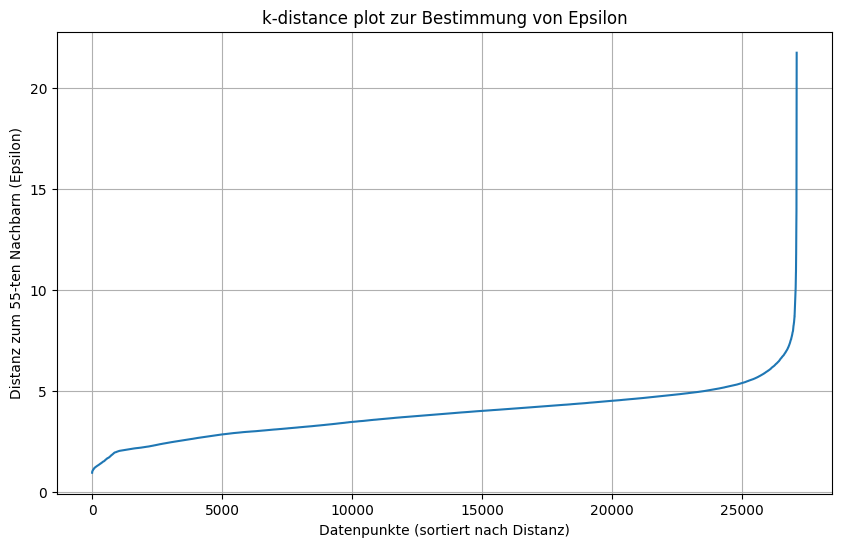

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Wir verwenden wieder den 'pca_df' DataFrame.
# Eine gute Faustregel für min_samples ist 2 * Anzahl der Dimensionen.
min_samples = 2 * pca_df.shape[1]

# Berechne die Distanz von jedem Punkt zu seinen Nachbarn
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(pca_df)
distances, indices = nn.kneighbors(pca_df)

# Nimm die Distanz zum k-ten Nachbarn (k = min_samples)
# und sortiere die Distanzen
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Zeichne den k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel("Datenpunkte (sortiert nach Distanz)")
plt.ylabel(f"Distanz zum {min_samples-1}-ten Nachbarn (Epsilon)")
plt.title("k-distance plot zur Bestimmung von Epsilon")
plt.grid(True)
plt.show()

## 8.2 Unsupervised Learning - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Setze die Parameter basierend auf deiner Analyse
# (Passe den eps-Wert an den Wert an, den du im Plot gefunden hast)
optimal_eps = 6.0
min_samples = 58

# Initialisiere und trainiere das DBSCAN-Modell
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(pca_df)

# Füge die neuen Cluster-Labels zum DataFrame hinzu
pca_df['dbscan_cluster'] = cluster_labels

## 8.3 DBSCAN zur Visualisierung

Anzahl der gefundenen Cluster: 1
Anzahl der Rauschpunkte (Ausreißer): 270


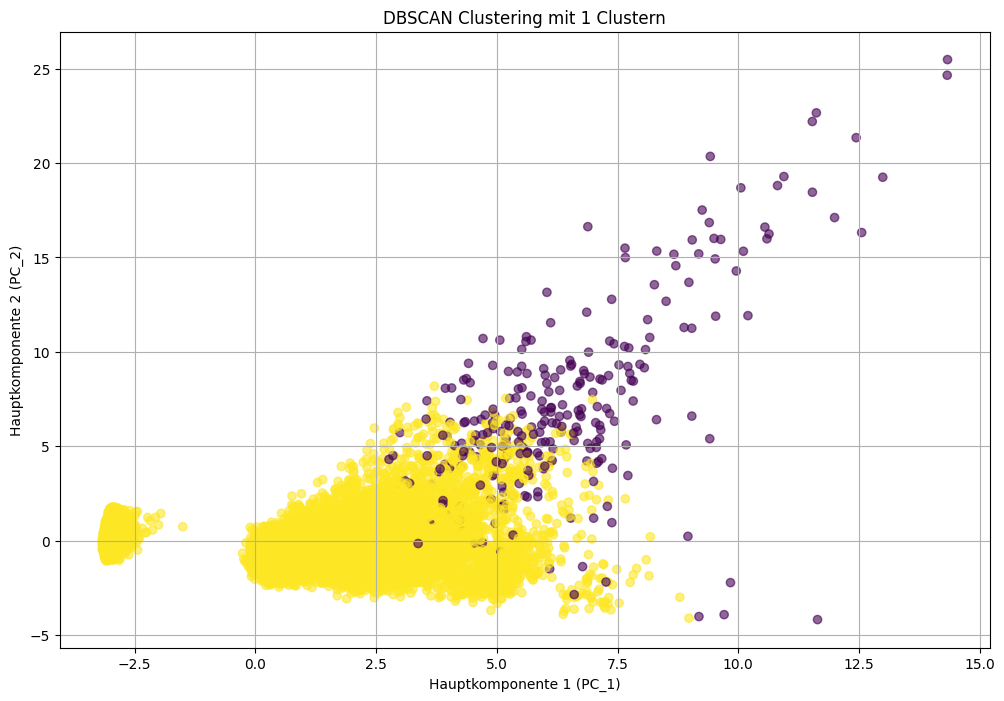

In [ ]:
# Analysiere die Ergebnisse
# Zähle die Anzahl der gefundenen Cluster (Label -1 ist nur Rauschen)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Anzahl der gefundenen Cluster: {n_clusters}")
print(f"Anzahl der Rauschpunkte (Ausreißer): {n_noise}")

# Visualisiere die Cluster
plt.figure(figsize=(12, 8))

# Zeichne einen Scatter-Plot
# PC_1 als x-Achse, PC_2 als y-Achse, eingefärbt nach Cluster-Label
plt.scatter(pca_df['PC_1'], pca_df['PC_2'], c=pca_df['dbscan_cluster'], cmap='viridis', marker='o', alpha=0.6)

plt.xlabel('Hauptkomponente 1 (PC_1)')
plt.ylabel('Hauptkomponente 2 (PC_2)')
plt.title(f'DBSCAN Clustering mit {n_clusters} Clustern')
plt.grid(True)
plt.show()